In [1]:
# Pacotes utilizados
using MLDatasets
using ImageCore
using PyPlot
using LinearAlgebra
using Random
using Statistics
using Printf
using Quaternions
using JLD2, FileIO
using ProgressMeter
using ImageTransformations
include("RealStorkey.jl")
include("Conversion.jl")
rng = MersenneTwister(1234);

In [2]:
# load full training set
train_x, train_y = CIFAR10.traindata();

# Número de memorias
Pv = 1:2:30

# Número de Bits
Nbits = 8

# Pixeles Imagen
imgsize = 5

# Number of simulations
Nsim = 100

# numero maximo de iterações
it_max = 1000

1000

In [3]:
MultiStates_binary,MultiStates_complex,MultiStates_quat = RealStorkey.Multi_Estados();

In [4]:
NoiseValues = 0.5

0.5

In [5]:
Success_total_2 = zeros(Float64,(length(Pv),));
Success_total_3 = zeros(Float64,(length(Pv),));

In [6]:
@showprogress for i=1:length(Pv)
    
    P = Pv[i]
    
    println("Iteracion")
    println(i)
    println(" ")
    

    Success_2 = zeros(Int64,(Nsim,));
    Success_3 = zeros(Int64,(Nsim,));    
    
    for j =1:Nsim
        
        # Indexes of the fundamental memories
        indFM = randperm(rng, size(train_x)[4])[1:P];

        # Bipolar fundamental memory set
        N = imgsize*imgsize*Nbits
        Ub = Array{Int64}(undef,N,P)



        for l=1:P

            # dataset image
            imgx = round.(Int,imresize(Conversion.cifar2gray(train_x[:,:,:,indFM[l]]),(imgsize,imgsize)))

            # Binary
            imbin,imsize = Conversion.gray2bin(imgx) 
            Ub[:,l] = imbin[:]

        end

        #print(size(Ub[:,1]))
        # Corrupting First Memory Element
        imbin,imsize = Conversion.gray2bin(round.(Int,imresize(Conversion.cifar2gray(train_x[:,:,:,indFM[1]]),(imgsize,imgsize)))) 

        # Generic Binary Corrupted Vector

        # Binary Corrupted Vector
        xbr = RealStorkey.noise_split(imbin,MultiStates_binary,NoiseValues)[:] ;
 
        
########################################################################################
### Storing Rules ######################################################################
########################################################################################        

        W_2 = RealStorkey.storkey_learning(Ub,RealStorkey.second)
        #W_59 = RealStorkey.storkey_59(Ub)        


########################################################################################
### Storkey de Segunda Ordem #############################################################
########################################################################################

 
        ## Recall using asynchronous update
        y3 = RealStorkey.Asy(W_2,xbr,it_max);

        Error = norm(Ub[:,1]-y3)

        if Error<1.e-4
            Success_2[j] = Success_2[j] + 1
        end   
########################################################################################
### Storkey eq 5.9    #############################################################
########################################################################################

 
        ## Recall using asynchronous update
        #y4 = RealStorkey.Asy(W_59,xbr,it_max);

        #Error = norm(Ub[:,1]-y4)

        #if Error<1.e-4
        #    Success_3[j] = Success_3[j] + 1
        #end                   
    end
    
    

    Success_total_2[i] = sum(Success_2)/Nsim
    #Success_total_3[i] = sum(Success_3)/Nsim
    #Success_total_3 
end

@save "JLDs/FixedNoise_Comparison_P_sec_part.jld2"  Success_total_2   NoiseValues Pv

Iteracion
1
 


Progress:   7%|██▊                                      |  ETA: 0:00:54

Iteracion
2
 


Progress:  13%|█████▌                                   |  ETA: 0:00:50

Iteracion
3
 


Progress:  20%|████████▎                                |  ETA: 0:00:54

Iteracion
4
 


Progress:  27%|██████████▉                              |  ETA: 0:01:00

Iteracion
5
 


Progress:  33%|█████████████▋                           |  ETA: 0:01:05

Iteracion
6
 


Progress:  40%|████████████████▍                        |  ETA: 0:01:10

Iteracion
7
 


Progress:  47%|███████████████████▏                     |  ETA: 0:01:13

Iteracion
8
 


Progress:  53%|█████████████████████▉                   |  ETA: 0:01:26

Iteracion
9
 


Progress:  60%|████████████████████████▋                |  ETA: 0:01:20

Iteracion
10
 


Progress:  67%|███████████████████████████▍             |  ETA: 0:01:12

Iteracion
11
 


Progress:  73%|██████████████████████████████▏          |  ETA: 0:01:09

Iteracion
12
 


Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:55

Iteracion
13
 


Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:39

Iteracion
14
 


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:21

Iteracion
15
 


Progress: 100%|█████████████████████████████████████████| Time: 0:05:24


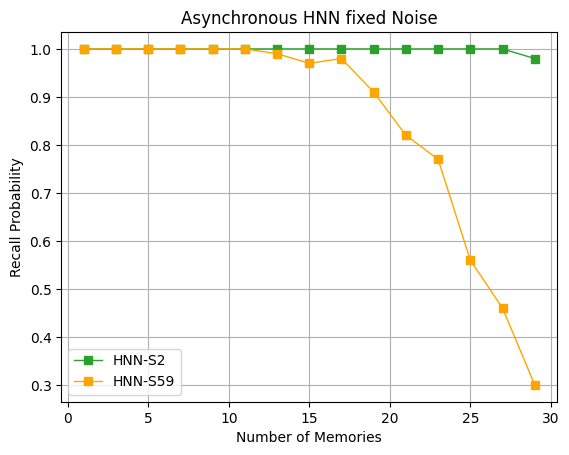

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
@load "JLDs/FixedNoise_Comparison_P_sec_part.jld2"

### Correlation ###

plot(Pv,Success_total_2,linewidth=1,color="#2ca02c",linestyle ="solid", marker="s",label = "HNN-S2")
#plot(Pv,Success_total_3,linewidth=1,color="orange",linestyle ="solid", marker="s",label = "HNN-S59")

xlabel("Number of Memories")
ylabel("Recall Probability")
#legend(bbox_to_anchor=[1,1],loc=2,borderaxespad=0)
legend()
title("Asynchronous HNN fixed Noise")
grid()
savefig("Figures/Asynchronous_P_sec_part.eps")
savefig("Figures/Asynchronous_P_sec_part.pdf")